In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("auto-mpg_kaggle.csv")
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## From the dataframe we could see all the features are numeric except car name, whereas in info() we can see that horsepower is defined as object. Lets change it to numeric.

In [4]:
data["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
#will replace the ? in horsepower to the mode of that column.
data.horsepower=data["horsepower"].replace("?","0")
data=data.astype({'horsepower':np.int64})
data.horsepower=data["horsepower"].replace(0,np.median(data.horsepower.values))
data.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193,  92, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82], dtype=int64)

In [6]:
#lets look into 5-Number summary
data.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.281407,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.229470,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


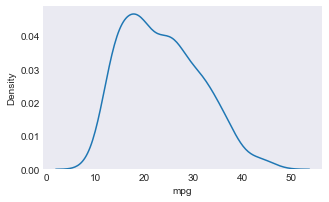

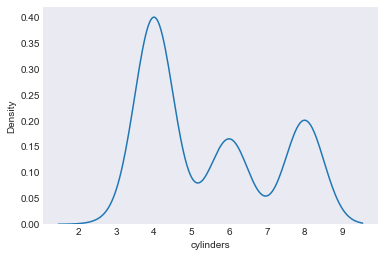

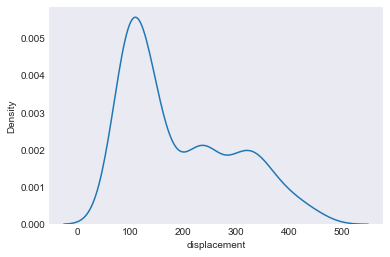

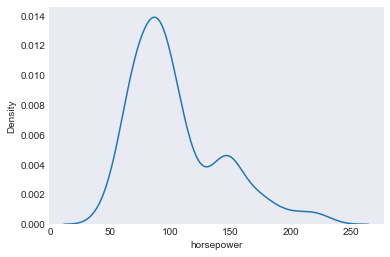

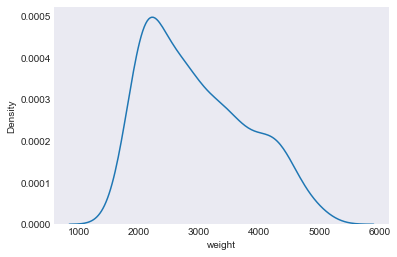

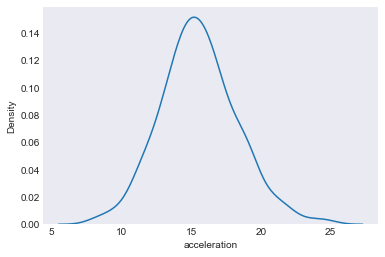

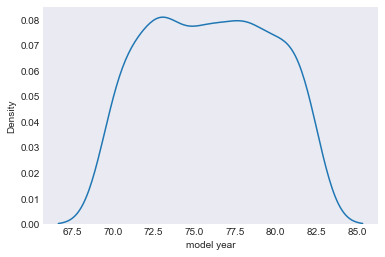

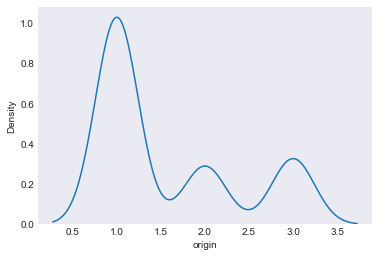

In [7]:
#Lets find the distribution of data in each features
plt.style.use("seaborn-dark")
plt.figure(figsize=(5,3))
for feature in range(len(data.columns)-1):
    sns.kdeplot(data=data[data.columns[feature]])
    plt.show()


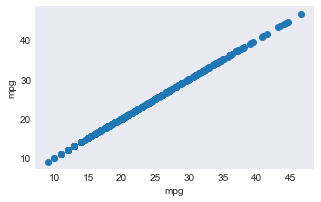

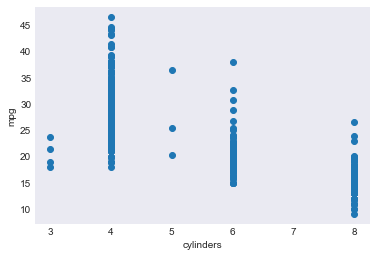

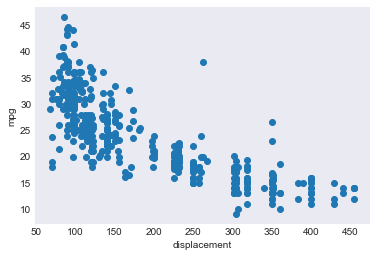

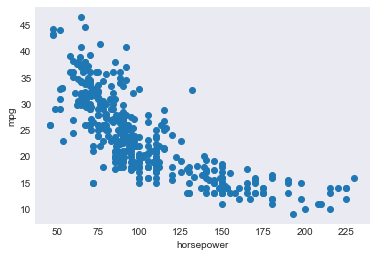

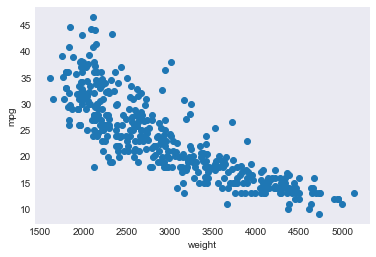

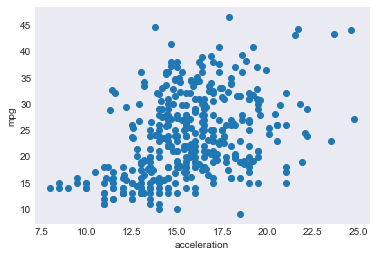

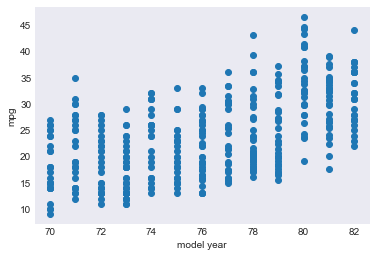

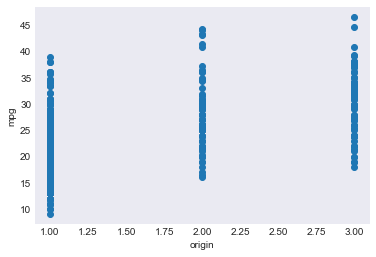

In [8]:
#lets find the relation on each column data with MPG
plt.figure(figsize=(5,3))
for feature in range(len(data.columns)-1):
    plt.scatter(data[data.columns[feature]],data["mpg"])
    plt.xlabel(data.columns.values[feature])
    plt.ylabel("mpg")
    plt.show()


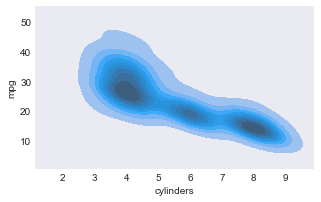

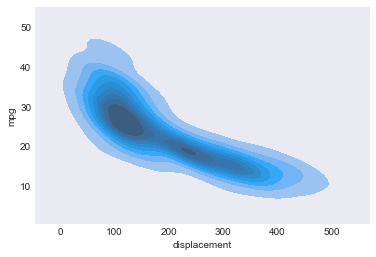

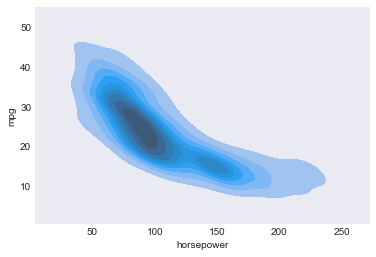

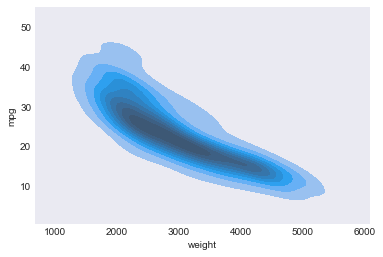

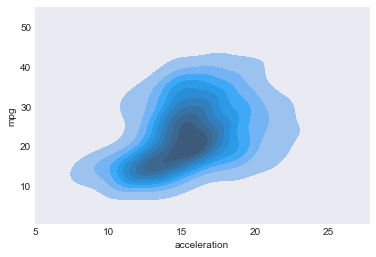

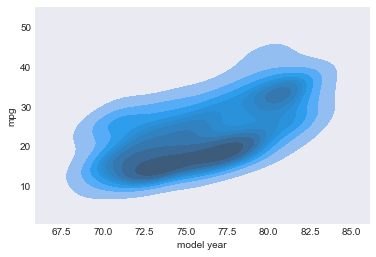

In [9]:
#lets find the relation on each column data with MPG
plt.figure(figsize=(5,3))
l1=list(data.iloc[:,1:-1].columns)
for feature in range(len(l1)-1):
    sns.kdeplot(data=data,shade=True,x=l1[feature],y="mpg")
    plt.show()


In [10]:
#Splitting input and out features
#Since Name is not needed, will remove that
X_data=data.iloc[:,1:8]
X_data

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [11]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()


#Scaling the (displacement,weight,horsepower,acceleration) columns
Xdata_scaled=pd.DataFrame(scale.fit_transform(X_data.iloc[:,1:5]),columns=list(X_data.iloc[:,1:5].columns))


In [12]:
#replacing scaled data in X_data
X_data["displacement"]=Xdata_scaled["displacement"]
X_data["horsepower"]=Xdata_scaled["horsepower"]
X_data["weight"]=Xdata_scaled["weight"]
X_data["acceleration"]=Xdata_scaled["acceleration"]
X_data

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,1.090604,0.673589,0.630870,-1.295498,70,1
1,8,1.503514,1.590266,0.854333,-1.477038,70,1
2,8,1.196232,1.197404,0.550470,-1.658577,70,1
3,8,1.061796,1.197404,0.546923,-1.295498,70,1
4,8,1.042591,0.935497,0.565841,-1.840117,70,1
...,...,...,...,...,...,...,...
393,4,-0.513026,-0.478804,-0.213324,0.011586,82,1
394,4,-0.925936,-1.369289,-0.993671,3.279296,82,2
395,4,-0.561039,-0.531185,-0.798585,-1.440730,82,1
396,4,-0.705077,-0.662139,-0.408411,1.100822,82,1



# Finding correlation

<AxesSubplot:>

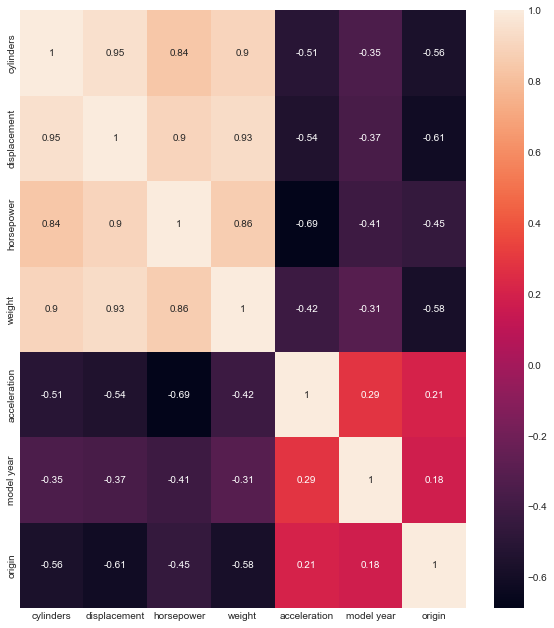

In [13]:
plt.figure(figsize=(10,11))
sns.heatmap(X_data.corr(),annot=True)

# Cylinder, displacement and weight are much correlated. So we can drop any 2 here, lets drop cylinder and acceleration

In [14]:
X_data=X_data.drop(labels=["weight","acceleration"],axis=1)
X_data

,cylinders,displacement,horsepower,model year,origin
0,8,1.090604,0.673589,70,1
1,8,1.503514,1.590266,70,1
2,8,1.196232,1.197404,70,1
3,8,1.061796,1.197404,70,1
4,8,1.042591,0.935497,70,1
...,...,...,...,...,...
393,4,-0.513026,-0.478804,82,1
394,4,-0.925936,-1.369289,82,2
395,4,-0.561039,-0.531185,82,1
396,4,-0.705077,-0.662139,82,1


# Checking for Outliers

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


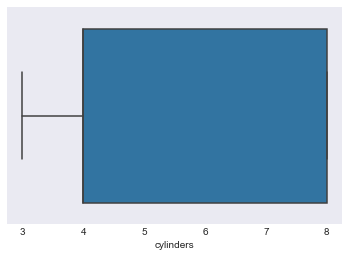

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


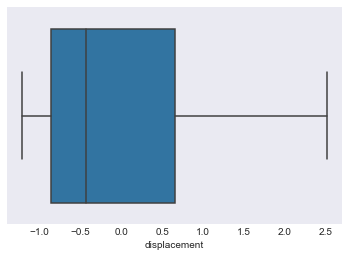

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


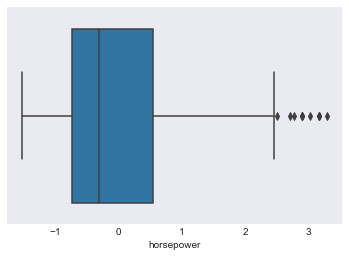

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


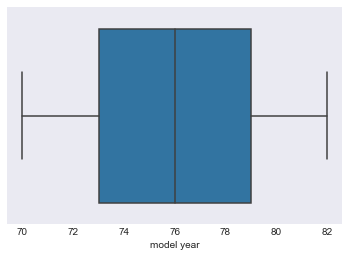

In [15]:
for feature in range(len(X_data.columns)-1):
    sns.boxplot(X_data[X_data.columns[feature]])
    plt.show()

In [16]:
from scipy import stats
#before detecting outliers lets merge dependent(y) with independent (x) data
X_data["mpg"]=data.iloc[:,0]
X_data["zh"]=np.abs(stats.zscore(X_data["horsepower"]))
print("Mean of z horsepower:",np.mean(zh))
sns.kdeplot(X_data["zh"])
plt.show()



NameError: name 'zh' is not defined

In [ ]:
# count of zh,za>2
print(np.count_nonzero(X_data["zh"]>2))


In [ ]:
#Removing outliers
X_newdata=X_data[(X_data.zh<2)]
X_newdata.shape

Y_data=pd.DataFrame(X_newdata["mpg"])



In [ ]:
#Removing zscore columns
X_newdata=X_newdata.drop(labels=["zh","mpg"],axis=1)
X_newdata

In [ ]:
Y_data

# Standardization


# Applying Dimension reduction technique PCA (Principal Component Analysis) to reduce the input features

In [ ]:
#PCA

from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pc=pca.fit_transform(X_newdata)
pca_df=pd.DataFrame(data=pc,columns=["pc1","pc2","pc3"])

Xfinal=pd.concat([pca_df],axis=1)


In [ ]:
Xfinal

In [ ]:
#Visualizing using PC
plt.figure(figsize=(14,9))
plt.axes(projection="3d")
plt.scatter(Xfinal.iloc[:,0],Xfinal.iloc[:,1],Xfinal.iloc[:,2],c=Y_data,cmap=plt.hot(),alpha=0.9)
plt.colorbar()
plt.show()

# Predicting Car's mileage using Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Xfinal,Y_data,test_size=0.25,random_state=89)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


In [ ]:
y_pred=model.predict(x_test)
y_pred

In [ ]:
import sklearn.metrics as metric
print("R2 of Linear Model",metric.r2_score(y_test,y_pred))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metric
kf=KFold(n_splits=8,random_state=None)
linmodel=LinearRegression()
r2score=[]
Y_data=Y_data.astype(int)
rf=KNeighborsClassifier(n_neighbors=20)
accscore=[]
for train_index,test_index in kf.split(Xfinal):
    X_train,X_test=Xfinal.iloc[train_index,:],Xfinal.iloc[test_index,:]
    Y_train,Y_test=Y_data.iloc[train_index,:],Y_data.iloc[test_index,:]
    
    ####Using Linear Regression to our model
    linmodel.fit(X_train,Y_train)
    Y_pred=linmodel.predict(X_test)
    acc=metric.r2_score(Y_test,Y_pred)
    r2score.append(acc)
    
    
    rf.fit(X_train,Y_train)
    Y_pred=rf.predict(X_test)
    acc=metric.accuracy_score(Y_test,Y_pred)
    accscore.append(acc)
print("*********Linear Regression*********")    
print("Average of R2_score:",(sum(r2score)/8))
print("Accuracy on k folds:",r2score)

print("*********Random Forest Regression*********")    
print("Average of Accuracy:",(sum(accscore)/8))
print("Accuracy on k folds:",accscore)



In [ ]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(Xfinal,Y_data,test_size=0.8,random_state=30)
model=model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Accoracy on Random Forest:",model.score(y_test,y_pred))

